In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import seaborn.objects as so
import helpers.functions as fn
import toolz
train_url = f'https://raw.githubusercontent.com/Mschaid/kg_workflow/main/train.csv'
test_url = f'https://raw.githubusercontent.com/Mschaid/kg_workflow/main/test.csv'

In [33]:
train, test = pd.read_csv(train_url), pd.read_csv(test_url)

In [34]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Sharp decline in survival when parents have more than 3 children, we can likely group and create a single dummy predictor for this category

,SibSp,Parch,PassengerId,Survived,Pclass,Age,Fare
0,0,0,245946,163,1289,12950.50,11407.3238
1,0,1,17315,25,68,1091.92,2791.8752
2,0,2,10652,21,61,544.33,1312.4082
3,0,3,859,1,3,24.00,19.2583
4,0,4,568,0,3,29.00,21.0750
5,0,5,1525,0,6,80.00,68.8125
6,1,0,49152,64,241,3260.50,5241.0795
7,1,1,29108,34,127,1460.00,2073.6458
8,1,2,9746,12,35,346.92,1360.6876
9,1,3,1599,1,8,118.00,91.7500


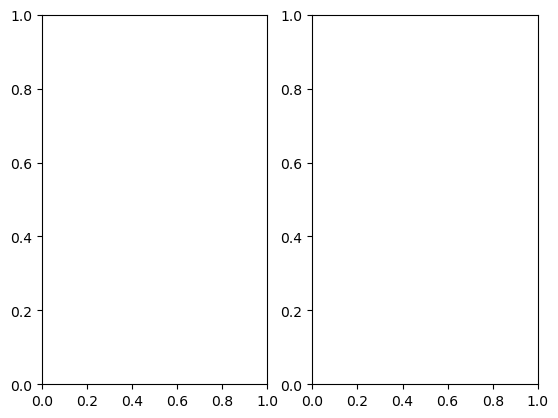

In [163]:
fig, ax = plt.subplots(ncols=2, nrows=1)
                       
train.groupby(by=['SibSp','Parch'], as_index=False).sum()



In [137]:
def process_data(df):
    dum_cols = ['Age_categories', 'Fare_categories', 'Title', 'Cabin_type', 'Sex','sibsp_cat','parch_cat']
    return(df
           .pipe(fn.process_missing)
           .pipe(fn.process_age)
           .pipe(fn.process_fare)
           .pipe(fn.process_cabin)
           .pipe(fn.process_titles)
           .pipe(fn.process_sibsp_parch)
           .pipe(fn.create_dummies, column_name=dum_cols)
           .drop(columns  = ['Age', 'SibSp', 'Parch', 
                             'Fare', 'Title_Miss', 'Title_Mr', 
                             'Title_Mrs','Sex_male','sibsp_cat_less_than_3',
                             'parch_cat_less_than_3'])
           )
 
 
process_train, process_test = process_data(train), process_data(test)
 

<AxesSubplot:>

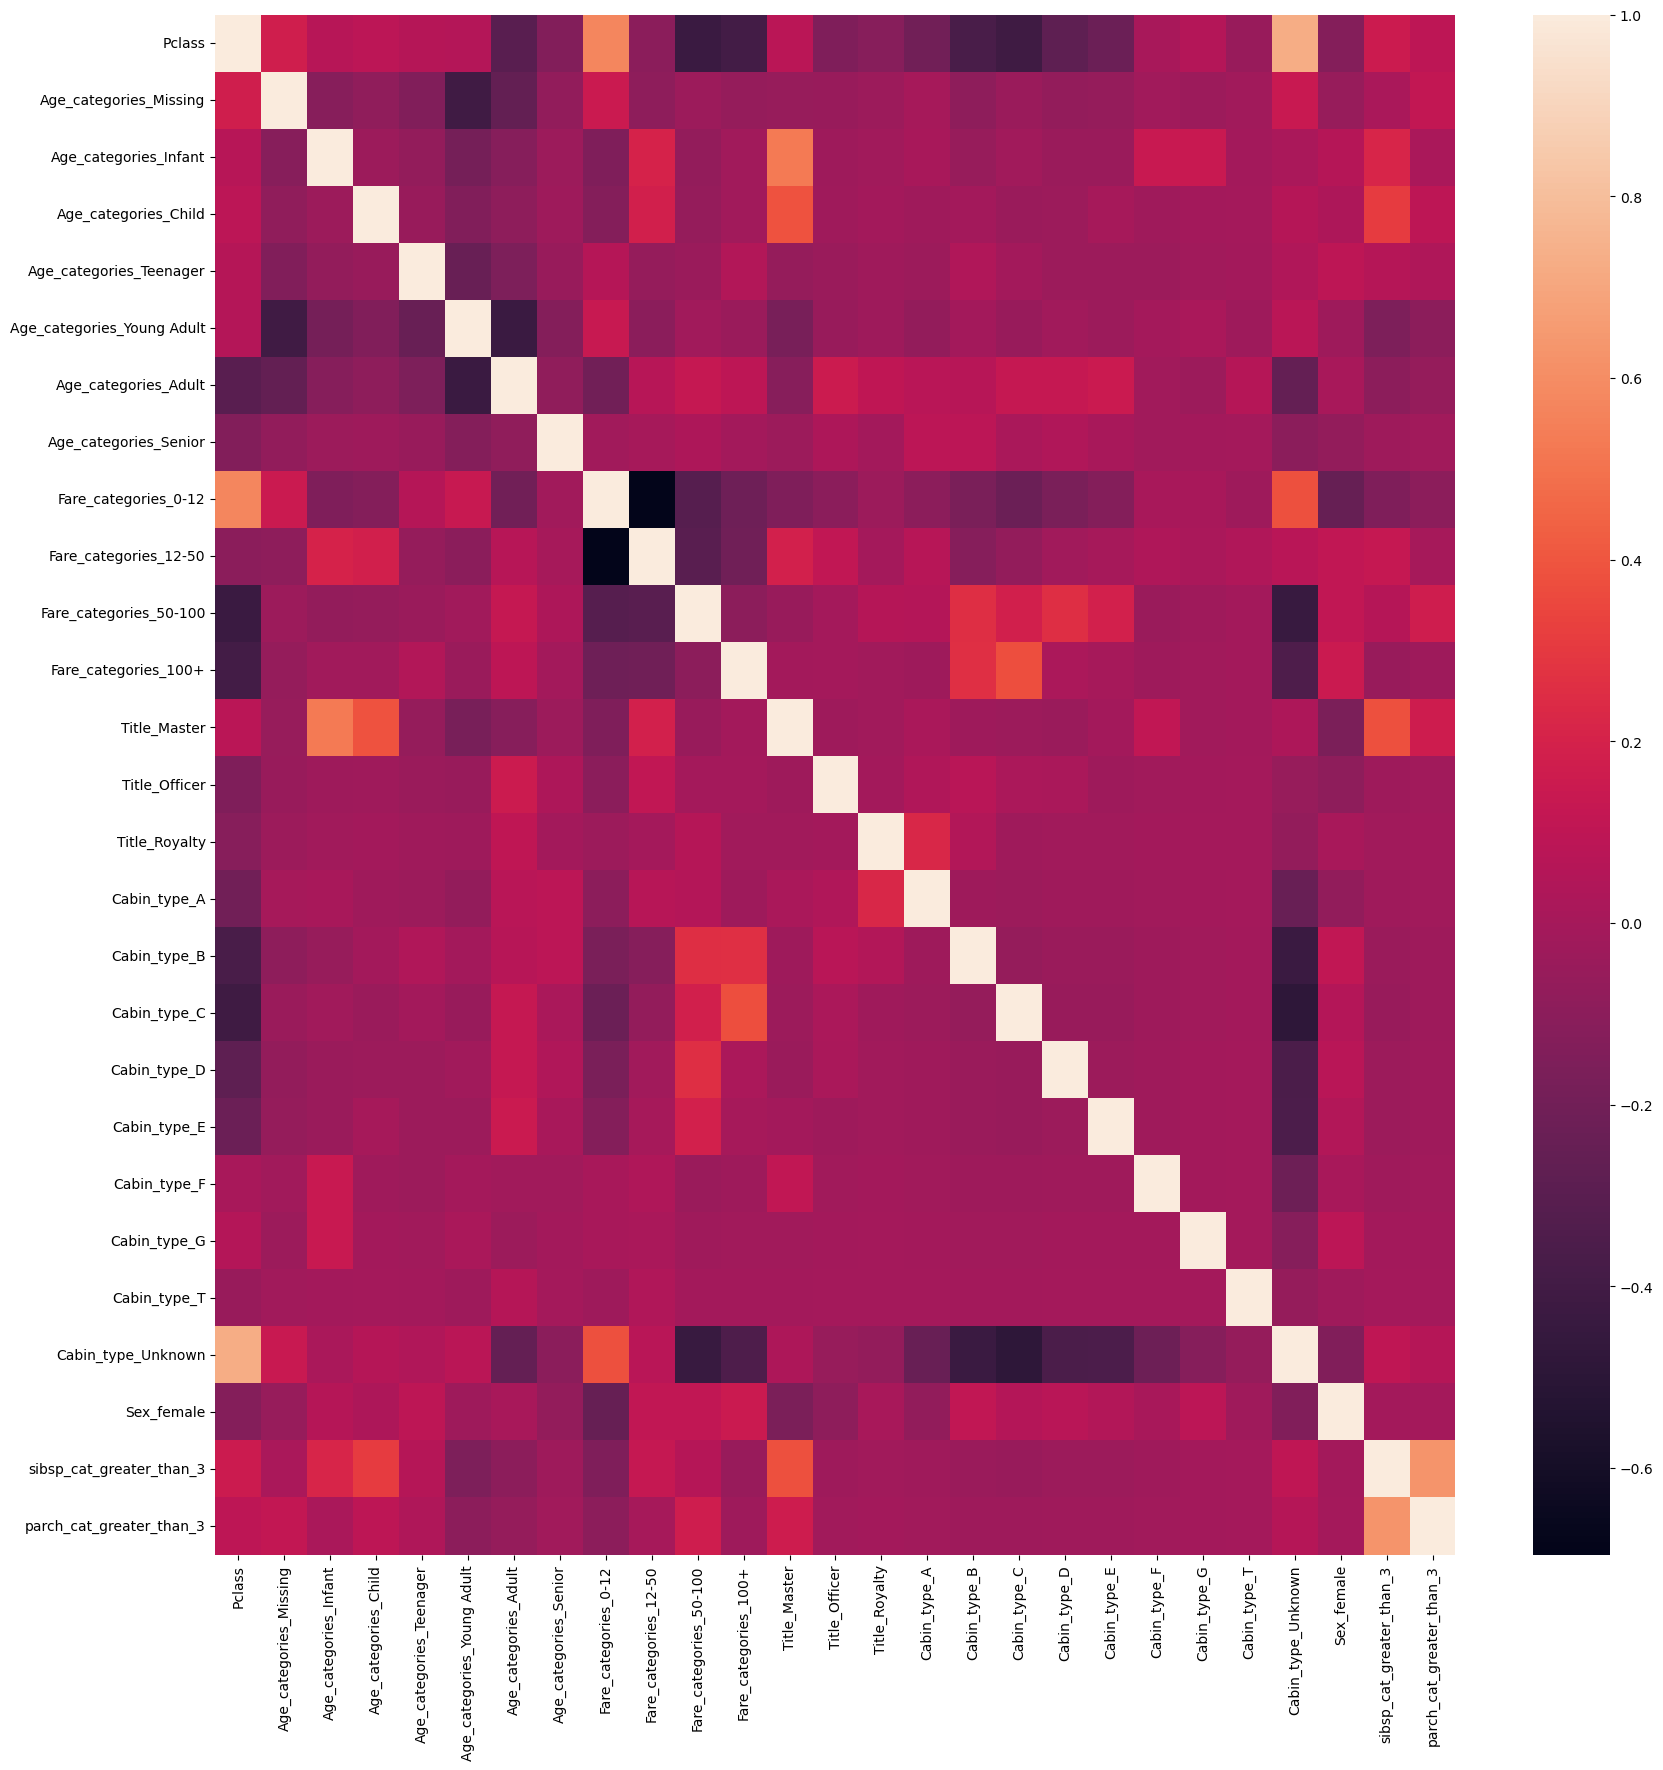

In [141]:
train_corr = process_train.drop(columns=['PassengerId', 'Survived']).corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train_corr, ax=ax)

## collinearity looks <u>OK</u>

will experiment with modeling further before dropping more columns

In [ ]:
cols_to_drop = ['Age', 'SibSp', 'Parch', 'Fare', 'Title_Miss', 'Title_Mr', 'Title_Mrs','Sex_male','sibsp_cat_less_than_3','parch_cat_less_than_3' ]